In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import math

In [2]:
data = pd.read_csv('iris.data')
print(data.head())
# data.isnull()


     A    B    C    D            E
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['E'] = encoder.fit_transform(data['E'])

print(data.head())

     A    B    C    D  E
0  5.1  3.5  1.4  0.2  0
1  4.9  3.0  1.4  0.2  0
2  4.7  3.2  1.3  0.2  0
3  4.6  3.1  1.5  0.2  0
4  5.0  3.6  1.4  0.2  0


In [4]:
data['E'].unique()

array([0, 1, 2])

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

In [83]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X = scaler.fit_transform(X)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)



In [7]:
classifier = LogisticRegression(max_iter=1000, multiclass='ovr')

classifier.fit(X_train, y_train)

C:\Users\sabih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classifier.coef_, classifier.intercept_)

print(confusion_matrix(y_test, y_pred))

0.9736842105263158
[[-0.43010636  0.79551367 -2.30765167 -0.95780846]
 [ 0.62754822 -0.41931223 -0.20442345 -0.77842622]
 [-0.19744187 -0.37620143  2.51207512  1.73623468]] [  9.3657089    1.42971822 -10.79542712]
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


iterations: 0 || cost: 2.079435541685836
iterations: 1000 || cost: -2.999998499754201e-06
iterations: 2000 || cost: -2.999998499754201e-06
iterations: 3000 || cost: -2.999998499754201e-06
iterations: 4000 || cost: -2.999998499754201e-06
iterations: 5000 || cost: -2.999998499754201e-06
iterations: 6000 || cost: -2.999998499754201e-06
iterations: 7000 || cost: -2.999998499754201e-06
iterations: 8000 || cost: -2.999998499754201e-06
iterations: 9000 || cost: -2.999998499754201e-06


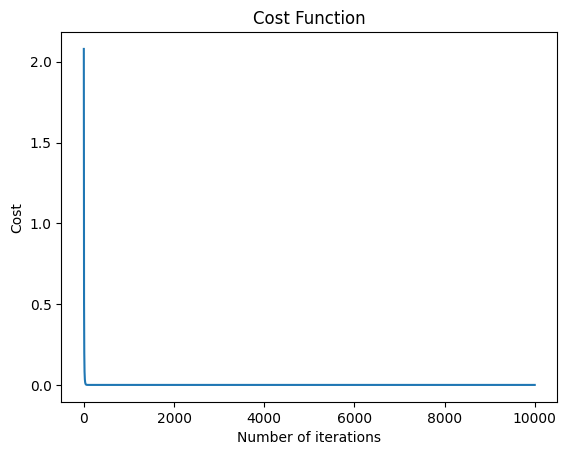

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def multiclass_logistic_regression(X, y, num_classes, num_iterations, alpha):
    m, n = X.shape
    theta = np.zeros((n, num_classes))

    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        cost = (-1/m) * np.sum(y*np.log(h + 1e-6))
        cost_history.append(cost)
        gradients = (1/m) * np.dot(X.T, (h-y))
        theta = theta - alpha * gradients

        if i % 1000 == 0:
            print('iterations:', i, '||', 'cost:', cost)

    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.show()
    

multiclass_logistic_regression(X,y,3,10000,0.01)



In [11]:
zero = np.where(y==0)
one = np.where(y==1)
two = np.where(y==2)

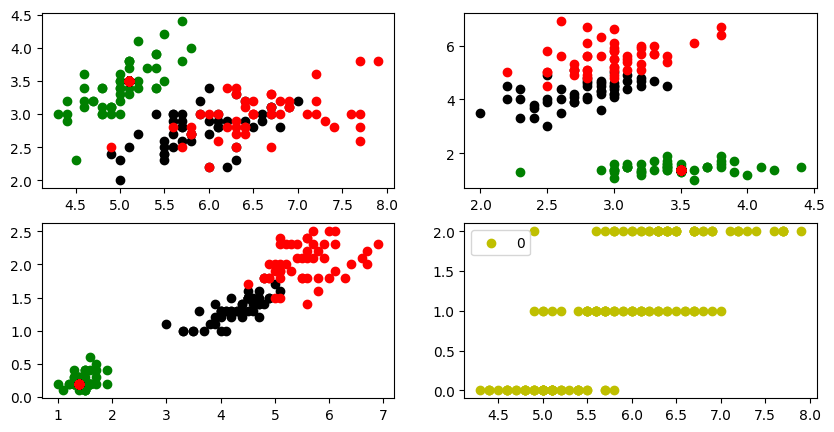

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.scatter(X[zero, 0], X[zero, 1], c='g', label='0')
plt.scatter(X[one, 0], X[one, 1], c='k', label='1')
plt.scatter(X[two, 0], X[two, 1], c='r', label='2')

plt.subplot(2,2,2)
plt.scatter(X[zero, 1], X[zero, 2], c='g', label='0')
plt.scatter(X[one, 1], X[one, 2], c='k', label='1')
plt.scatter(X[two, 1], X[two, 2], c='r', label='2')

plt.subplot(2,2,3)
plt.scatter(X[zero, 2], X[zero, 3], c='g', label='0')
plt.scatter(X[one, 2], X[one, 3], c='k', label='1')
plt.scatter(X[two, 2], X[two, 3], c='r', label='2')

plt.subplot(2,2,4)
plt.scatter(X[:,0], y, c='y', label='0')

plt.legend()

In [15]:
x_values = [np.min(X[:, 1] -5 ), np.max(X[:, 1] +5 )]
print(x_values)

[-3.0, 9.4]


In [34]:
w1,w2,w3,w4 = classifier.coef_.T

c = -b/w2
m = -w1/w2
xmin, xmax = -1,2
ymin, ymax = -1,2.5

xd = np.array([xmin, xmax])

print(c,m)
print(xd)

[-11.77315903  22.33588291  24.89546299] [ 0.54066495  1.49661321 -0.52483018]
[-1  2]


In [40]:
print(classifier.intercept_.shape)
print(classifier.coef_.shape)

(3,)
(3, 4)


AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xlim'

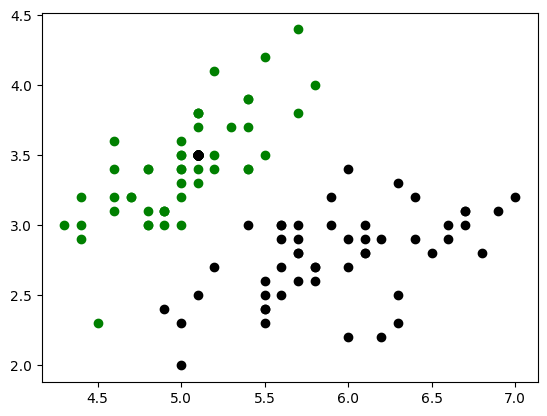

In [69]:
plt.scatter(X[zero, 0], X[zero, 1], c='g', label='0')
plt.scatter(X[one, 0], X[one, 1], c='k', label='1')

print(plt.get_xlim())

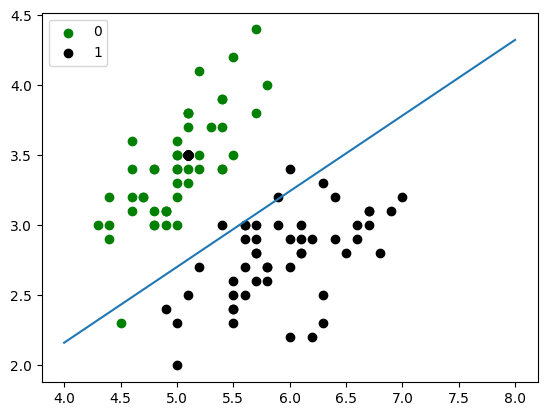

In [67]:
w = classifier.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(4,8)
# yy = a * xx - (classifier.intercept_[0]) / w[1]
yy = a*xx

plt.plot(xx, yy)
plt.scatter(X[zero, 0], X[zero, 1], c='g', label='0')
plt.scatter(X[one, 0], X[one, 1], c='k', label='1')
# plt.scatter(X[two, 0], X[two, 1], c='r', label='2')

plt.legend()

In [27]:
b = classifier.intercept_[0]
w1,w2,w3,w4 = classifier.coef_.T

c = -b/w2
m = -w1/w2

xmin, xmax = -1,2
ymin, ymax = -1,2.5

xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1)

plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [16]:
parameters = classifier.coef_[0]
# Intercept (a.k.a. bias) added to the decision function. (theta 0)
parameter0 = classifier.intercept_

# Plotting the decision boundary
fig = plt.figure(figsize=(10,7))
x_values = [np.min(X[:, 1] -5 ), np.max(X[:, 1] +5 )]
# calcul y values
y_values = np.dot((-1./parameters[1]), (np.dot(parameters[0],x_values) + parameter0))
# colors=['red' if l==0 else 'blue' for l in y]
plt.scatter(X[:, 0], X[:, 1], label='Logistics regression')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.show()

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

<Figure size 1000x700 with 0 Axes>

In [131]:
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1,1)
yy = a * xx - (classifier.intercept_[0]) / w[1]

print(w, a, classifier.intercept_)
print(xx, yy)

# plt.plot(xx, yy, c='r')

[-0.43010636  0.79551367 -2.30765167 -0.95780846] 0.5406649497197463 [  9.3657089    1.42971822 -10.79542712]
[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ] [-12.31382398 -12.29175602 -12.26968806 -12.2476201  -12.22555215
 -12.20348419 -12.18141623 -12.15934828 -12.13728032 -12.11521236
 -12.0931444  -12.07107645 -12.04900849 -12.02694053 -12.00487258
 -11.98280462 -11.96073666 -11.9386687  -11.91660075 -11.89453279
 -11.87246483 -1

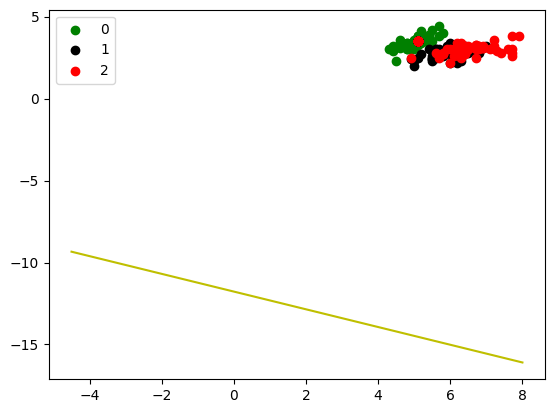

In [121]:
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-4.5, 8)
yy = a * xx - (classifier.intercept_[0]) / w[1]

plt.plot(xx, yy, c='y')

plt.scatter(X[zero, 0], X[zero, 1], c='g', label='0')
plt.scatter(X[one, 0], X[one, 1], c='k', label='1')
plt.scatter(X[two, 0], X[two, 1], c='r', label='2')

plt.legend()

<Axes: >

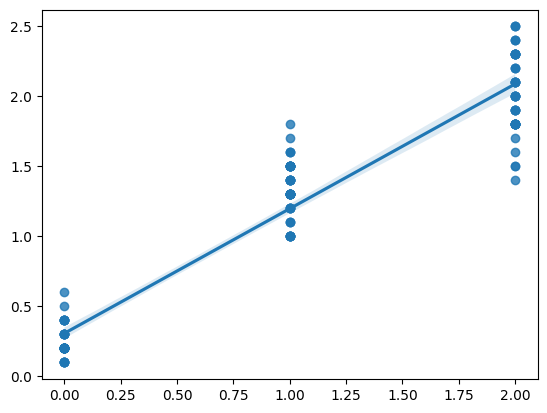

In [103]:
sn.regplot(data, x=y, y=X[:,3])

In [104]:
# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the decision boundaries as lines
color_list = ['r', 'g', 'b']
for i, color in zip(classifier.classes_, color_list):
    coef = classifier.coef_[i]
    intercept = classifier.intercept_[i]
    line = -(coef[0] * xx + coef[1] * yy + intercept) / coef[2]
    plt.plot(xx, line, c=color)

# Add the training data to the plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')

# Add a legend
plt.legend()

# Add axes labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multi-Class Logistic Regression')

plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.

In [113]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ohe = OneHotEncoder()

# y = ohe.fit_transform(y)
# print(y.toarray())

In [126]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# transformer = make_column_transformer(
#     (OneHotEncoder(), ['Class']),
#     remainder='passthrough')

# new_data = transformer.fit_transform(data)

# transformed_data = pd.DataFrame(new_data)
# print(transformed_data)